<img src="ent-tp2.PNG">

# TP2 Interpolation Numérique 

# INTRODUCTION GENERALE :
> En analyse numérique, l'interpolation polynomial est une technique d'interpolation d'une fonction par un polynome qui permet de remplacer une courbe ou une fonction par une autre courbe ou fonction pour but de le simplifier.
>
>le but est de chercher à trouver un polynome p vérifiant un telle système

## Exercice 1

On considère le programme MATLAB suivant :
``` octave
function u=prog(x,y,c)
S = y; 
n = length(x); 
for j=1:n
    L = c-x; 
    for k=1:n
        if (k == j)
           L(k) = 1;
        else
           L(k) = L(k)/(x(j) - x(k));
        end 
    end 
    S(j) = S(j)*prod(L); 
end 
u=sum(S); 
```

## Version Python

In [5]:
from numpy import prod
def prog(x,y,c):
    S = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        S.append(y[j]*prod(L))
        
    return  sum(S)

In [6]:

X=[1 ,2 ,3 ,4,-2];
Y=[-1, 0, 2 ,1,3];
for i in X:
    print(prog(X,Y,i))
sum(X)

-1.0
0.0
2.0
1.0
3.0


8

**Polynome d'interpolation de Lagrange** 
> Soient $(x_0,y_0), \ldots,(x_k,y_k),\ldots ,(x_n,k_n)$ $n+1$ points deux à deux distincts, le polynôme d'interpolation de Lagrange associés à ces points supports est défini par :
> $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{n})}{(x_0-x_1)(x_0-x_2)\ldots(x_0-x_{n})}$ et $L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  **x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))**  et  **y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))**  deux vecteurs de même longueur  `n` et `c`  un nombre réel donné.

## Code python

In [9]:
from numpy import prod
def PR(x,y,c):
    s = [] 
    n = len(x)
    
    for j in range(n):
        L =[c-xx for xx in x]
        for k in range(n):
            if (k == j):                
                L[k] = 1
            else:
                L[k] = L[k]/(x[j] - x[k])   
        s.append(y[j]*prod(L))
        
    return  sum(s)

In [12]:
x=[1 ,2 ,3 ,4];
y=[-1, 0, 2 ,1];
for i in x:
    print(PR(x,y,i))
sum(x)

-1.0
0.0
2.0
1.0


10

2) Que contient le vecteur  LL  après la fin de la boucle  kk .

In [14]:
x=[1,2,3,4]
y=[-1,0,2,1]

In [17]:
def PRO(x,y,c):
    s = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                s.append(y[j]*prod(L))

            return L[3]

In [18]:
for i in x:
    print(PRO(x,y,i))

1
1
1
1


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

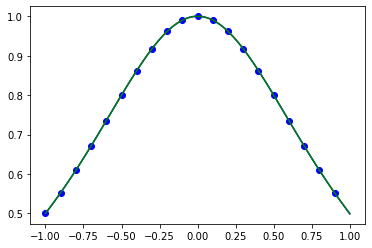

In [30]:
import matplotlib.pyplot as plt 
import numpy as np
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
pn=[]
t=np.linspace(-1,1,100);
for i in range (len(t)):
    pn.append(PR(x,y,t[i]))
plt.plot(t,pn,"b",x,y,"bo",t,f(t),"g")  
plt.show() 

4) On considère la fonction $F$ suivante :
$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$
et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

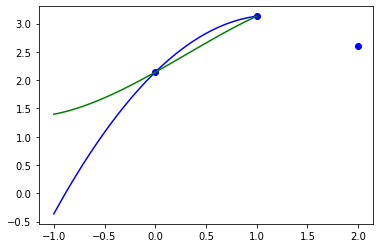

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
pt=[]
x=np.arange(0,3)
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2=np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pt.append(PR(x,y,t[i]))
plt.plot(t,pt,"b",x,y,"bo",t,f2(t),"g")
plt.show()

4.2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

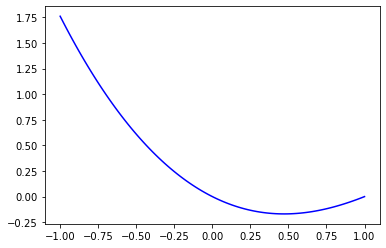

In [28]:
plt.plot(t,f2(t)-pt,"b")
plt.show()

### conclusion
>dans la formule de lagrange on trouve un unique polynome vérifiant un telle système appelé le polynome de lagrange .
>
>l'inconveniant de l'interpolation de lagrange est lorsqu'on ajoute un point aux points existants on a recours à re-calculer tous les élements c'est à dire à répèter tout le travail et donc une perte de temps.

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

Text(0.5, 1.0, 'Interpolation Equidistante avec N=7')

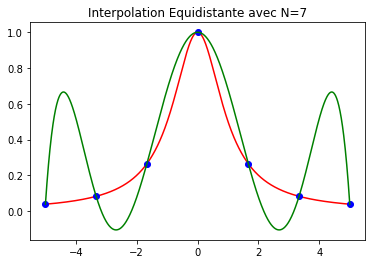

In [33]:
N=7 
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=7')

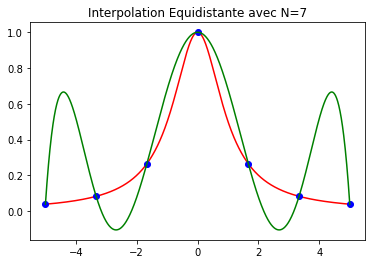

In [34]:
N=7 
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=9')

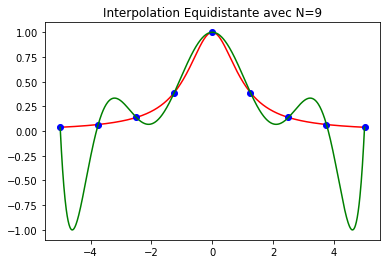

In [35]:
N=9
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")

Text(0.5, 1.0, 'Interpolation Equidistante avec N=10')

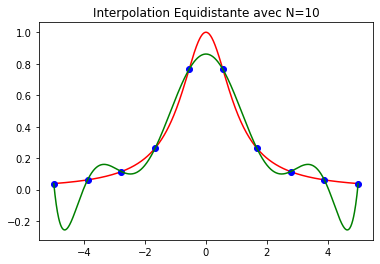

In [36]:
N=10
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.plot(t,f(t),'r',X,Y,'ob', t, np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [41]:
def tcheb(a,b,n):
    v=[]
    for k in range(n):
        v.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return v
tcheb(-5,5,10)
tcheb(-5,5,11)
tcheb(-5,5,16)
tcheb(-5,5,17)

[-4.903926402016152,
 -5.0,
 -4.903926402016152,
 -4.619397662556434,
 -4.157348061512726,
 -3.5355339059327378,
 -2.7778511650980113,
 -1.9134171618254492,
 -0.9754516100806416,
 -3.061616997868383e-16,
 0.975451610080641,
 1.9134171618254485,
 2.77785116509801,
 3.5355339059327373,
 4.157348061512726,
 4.619397662556434,
 4.903926402016152]

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=10')

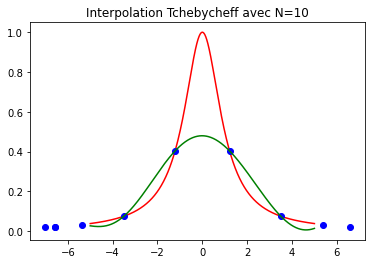

In [42]:
N=10
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=11')

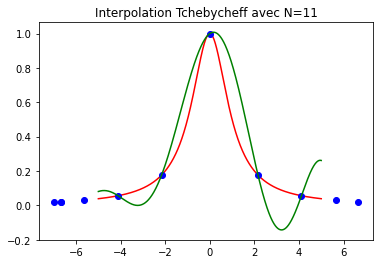

In [43]:
N=11
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=16')

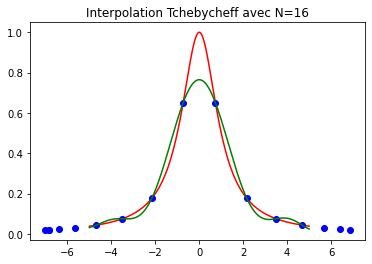

In [44]:
N=16
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")

C:\Users\Asus\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Interpolation Tchebycheff avec N=17')

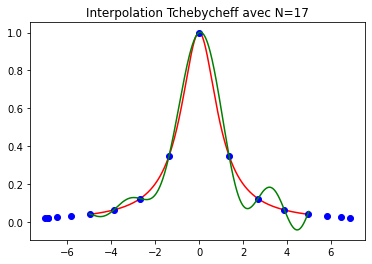

In [45]:
N=17
f= lambda x:1/(1+x**2)
Xt=tcheb(-7,7,N)
Yt=[]
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
plt.plot(t,f(t),'r',Xt,Yt,'ob', t, np.polyval(pt,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")

## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [47]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m) 
    for k in range (1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [48]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [49]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [50]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

In [ ]:
##Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

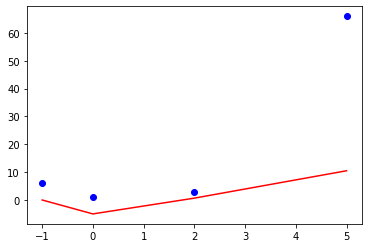

In [51]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [55]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.

In [56]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

# CONCLUSION GENERALE :